<a href="https://colab.research.google.com/github/ayelar/challenge-alura-store/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [67]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [68]:
tienda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                2359 non-null   object 
 1   Categoría del Producto  2359 non-null   object 
 2   Precio                  2359 non-null   float64
 3   Costo de envío          2359 non-null   float64
 4   Fecha de Compra         2359 non-null   object 
 5   Vendedor                2359 non-null   object 
 6   Lugar de Compra         2359 non-null   object 
 7   Calificación            2359 non-null   int64  
 8   Método de pago          2359 non-null   object 
 9   Cantidad de cuotas      2359 non-null   int64  
 10  lat                     2359 non-null   float64
 11  lon                     2359 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 221.3+ KB


In [69]:
tienda2.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Silla de oficina,Muebles,283600.0,15300.0,04/08/2021,Izabela de León,Medellín,1,Nequi,1,6.25184,-75.56359
1,Pandereta,Instrumentos musicales,76800.0,2300.0,26/11/2020,Blanca Ramirez,Medellín,3,Tarjeta de crédito,4,6.25184,-75.56359
2,Cama king,Muebles,443300.0,23800.0,22/10/2021,Izabela de León,Pereira,5,Tarjeta de crédito,10,4.81333,-75.69611
3,Cama king,Muebles,906200.0,46400.0,04/05/2022,Maria Alfonso,Cali,5,Tarjeta de crédito,10,3.43722,-76.52250
4,Silla de oficina,Muebles,397800.0,19400.0,26/02/2022,Lucas Olivera,Bogotá,4,Tarjeta de crédito,3,4.60971,-74.08175


#1. Análisis de facturación



In [70]:
facturacion1 = tienda['Precio'].sum()
print(facturacion1)

1150880400.0


In [71]:
facturacion2 = tienda2['Precio'].sum()
print(facturacion2)

1116343500.0


In [72]:
facturacion3 = tienda3['Precio'].sum()
print(facturacion3)

1098019600.0


In [73]:
facturacion4 = tienda4['Precio'].sum()
print(facturacion4)

1038375700.0


## **Graficar las facturaciones para compararlas**

In [74]:
import matplotlib.pyplot as plt

In [75]:
facturacion_tiendas = ({
    'Tienda': ['tienda', 'tienda2', 'tienda3', 'tienda4'],
    'Facturación': [facturacion1, facturacion2, facturacion3, facturacion4]
})

df_facturacion = pd.DataFrame(facturacion_tiendas)
df_facturacion

,Tienda,Facturación
0,tienda,1.150880e+09
1,tienda2,1.116344e+09
2,tienda3,1.098020e+09
3,tienda4,1.038376e+09


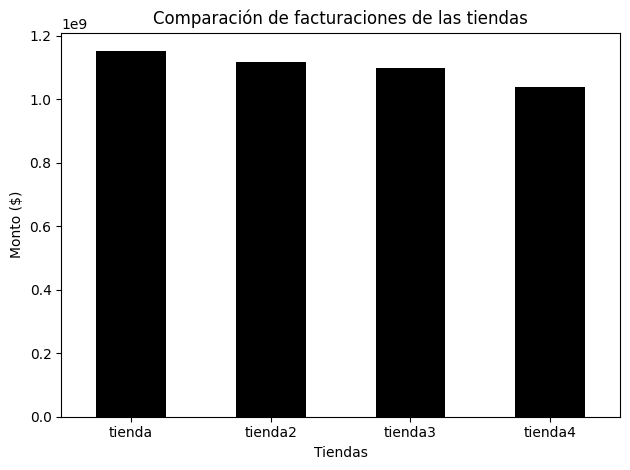

In [76]:
df_facturacion.plot(
    x='Tienda',
    y='Facturación',
    kind='bar',
    legend=False,
    color='black'
)

plt.title('Comparación de facturaciones de las tiendas')
plt.ylabel('Monto ($)')
plt.xlabel('Tiendas')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# 2. Ventas por categoría

### **Tienda 1: cantidad de productos vendidos por categoría**

In [77]:
tienda

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359
...,...,...,...,...,...,...,...,...,...,...,...,...
2354,Iphone 15,Electrónicos,1284400.0,66600.0,15/11/2021,Izabela de León,Medellín,1,Nequi,1,6.25184,-75.56359
2355,Impresora,Electrónicos,282800.0,15300.0,18/03/2023,Lucas Olivera,Bogotá,5,Nequi,1,4.60971,-74.08175
2356,Juego de mesa,Juguetes,122900.0,7200.0,06/07/2021,Lucas Olivera,Cali,5,Tarjeta de crédito,4,3.43722,-76.52250
2357,Cama box,Muebles,691300.0,35000.0,02/05/2022,Pedro Gomez,Pasto,1,Tarjeta de crédito,2,1.21361,-77.28111


In [78]:
tienda.count()

,0
Producto,2359
Categoría del Producto,2359
Precio,2359
Costo de envío,2359
Fecha de Compra,2359
Vendedor,2359
Lugar de Compra,2359
Calificación,2359
Método de pago,2359
Cantidad de cuotas,2359


In [79]:
t1_productos = tienda.groupby('Categoría del Producto')['Producto'].count().sort_values(ascending=False)
t1_productos

,Producto
Categoría del Producto,
Muebles,465
Electrónicos,448
Juguetes,324
Electrodomésticos,312
Deportes y diversión,284
Instrumentos musicales,182
Libros,173
Artículos para el hogar,171


In [80]:
t1_productos.sum()

np.int64(2359)

### **Tienda 2: Cantidad de productos vendidos por categoría.**

In [81]:
tienda2.count()

,0
Producto,2359
Categoría del Producto,2359
Precio,2359
Costo de envío,2359
Fecha de Compra,2359
Vendedor,2359
Lugar de Compra,2359
Calificación,2359
Método de pago,2359
Cantidad de cuotas,2359


In [82]:
t2_productos = tienda2.groupby('Categoría del Producto')['Producto'].count().sort_values(ascending=False)
t2_productos

,Producto
Categoría del Producto,
Muebles,442
Electrónicos,422
Juguetes,313
Electrodomésticos,305
Deportes y diversión,275
Instrumentos musicales,224
Libros,197
Artículos para el hogar,181


In [83]:
t2_productos.sum()

np.int64(2359)

### **Tienda 3: Cantidad de productos vendidos por categoría.**

In [84]:
tienda3.count()

,0
Producto,2359
Categoría del Producto,2359
Precio,2359
Costo de envío,2359
Fecha de Compra,2359
Vendedor,2359
Lugar de Compra,2359
Calificación,2359
Método de pago,2359
Cantidad de cuotas,2359


In [85]:
t3_productos = tienda3.groupby('Categoría del Producto')['Producto'].count().sort_values(ascending=False)
t3_productos

,Producto
Categoría del Producto,
Muebles,499
Electrónicos,451
Juguetes,315
Electrodomésticos,278
Deportes y diversión,277
Libros,185
Artículos para el hogar,177
Instrumentos musicales,177


### **Tienda 4: Cantidad de productos vendidos por categoría.**

In [86]:
tienda4.count()

,0
Producto,2358
Categoría del Producto,2358
Precio,2358
Costo de envío,2358
Fecha de Compra,2358
Vendedor,2358
Lugar de Compra,2358
Calificación,2358
Método de pago,2358
Cantidad de cuotas,2358


In [87]:
t4_productos = tienda4.groupby('Categoría del Producto')['Producto'].count().sort_values(ascending=False)
t4_productos

,Producto
Categoría del Producto,
Muebles,480
Electrónicos,451
Juguetes,338
Deportes y diversión,277
Electrodomésticos,254
Artículos para el hogar,201
Libros,187
Instrumentos musicales,170


In [88]:
comparacion_categorias = pd.concat([t1_productos, t2_productos, t3_productos, t4_productos], axis=1)
comparacion_categorias

,Producto,Producto,Producto,Producto
Categoría del Producto,,,,
Muebles,465,442,499,480
Electrónicos,448,422,451,451
Juguetes,324,313,315,338
Electrodomésticos,312,305,278,254
Deportes y diversión,284,275,277,277
Instrumentos musicales,182,224,177,170
Libros,173,197,185,187
Artículos para el hogar,171,181,177,201


# 3. Calificación promedio de la tienda


### **Calificacion tienda 1.**

In [89]:
tienda['Calificación'].mean()

np.float64(3.976685036032217)

In [90]:
t1_calificacion = tienda.groupby('Categoría del Producto')['Calificación'].mean().sort_values(ascending=False)
t1_calificacion

,Calificación
Categoría del Producto,
Juguetes,4.077160
Instrumentos musicales,4.049451
Electrodomésticos,4.032051
Electrónicos,4.004464
Libros,3.976879
Muebles,3.946237
Deportes y diversión,3.897887
Artículos para el hogar,3.748538


### **Calificacion tienda 2.**

In [91]:
tienda2['Calificación'].mean()

np.float64(4.037303942348453)

In [92]:
t2_calificacion = tienda2.groupby('Categoría del Producto')['Calificación'].mean().sort_values(ascending=False)
t2_calificacion

,Calificación
Categoría del Producto,
Muebles,4.092760
Electrodomésticos,4.072131
Artículos para el hogar,4.071823
Deportes y diversión,4.065455
Instrumentos musicales,4.035714
Juguetes,4.025559
Electrónicos,3.971564
Libros,3.949239


### **Calificacion tienda 3.**

In [93]:
tienda3['Calificación'].mean()

np.float64(4.048325561678677)

In [94]:
t3_calificacion = tienda3.groupby('Categoría del Producto')['Calificación'].mean().sort_values(ascending=False)
t3_calificacion

,Calificación
Categoría del Producto,
Juguetes,4.196825
Muebles,4.098196
Artículos para el hogar,4.073446
Libros,4.048649
Electrodomésticos,4.010791
Instrumentos musicales,4.005650
Electrónicos,3.986696
Deportes y diversión,3.938628


### **Calificacion tienda 4.**

In [95]:
tienda4['Calificación'].mean()

np.float64(3.9957591178965224)

In [96]:
t4_calificacion = tienda4.groupby('Categoría del Producto')['Calificación'].mean().sort_values(ascending=False)
t4_calificacion

,Calificación
Categoría del Producto,
Deportes y diversión,4.054152
Libros,4.042781
Artículos para el hogar,4.009950
Electrónicos,4.006652
Muebles,3.997917
Juguetes,3.988166
Electrodomésticos,3.929134
Instrumentos musicales,3.911765


# 4. Productos más y menos vendidos

### **Tienda 1: productos más y menos vendidos.**

In [102]:
t1_venta_productos = tienda['Producto'].value_counts().sort_values(ascending=False)
t1_venta_productos

,count
Producto,
Microondas,60
TV LED UHD 4K,60
Armario,60
Secadora de ropa,58
Mesa de noche,56
Bloques de construcción,56
Balón de baloncesto,55
Bicicleta,54
Vaso térmico,54


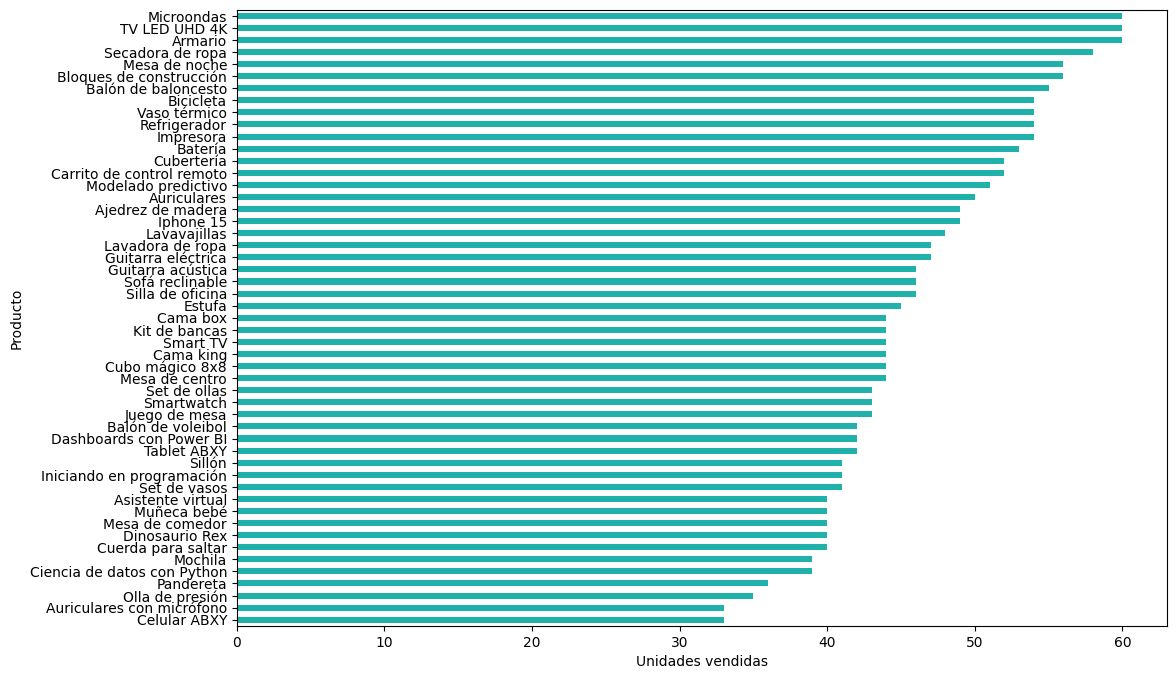

In [105]:
t1_venta_productos.plot(kind='barh',figsize=(12,8),color='lightseagreen', xlabel='Unidades vendidas')
plt.gca().invert_yaxis()

In [106]:
t1_top5  = t1_venta_productos.head(5)
t1_ultimos5 = t1_venta_productos.tail(5)

In [108]:
t1_top_ultimos = pd.concat([t1_top5, t1_ultimos5], axis=1)
t1_top_ultimos

,count,count
Producto,,
Microondas,60.0,NaN
TV LED UHD 4K,60.0,NaN
Armario,60.0,NaN
Secadora de ropa,58.0,NaN
Mesa de noche,56.0,NaN
Ciencia de datos con Python,NaN,39.0
Pandereta,NaN,36.0
Olla de presión,NaN,35.0
Auriculares con micrófono,NaN,33.0


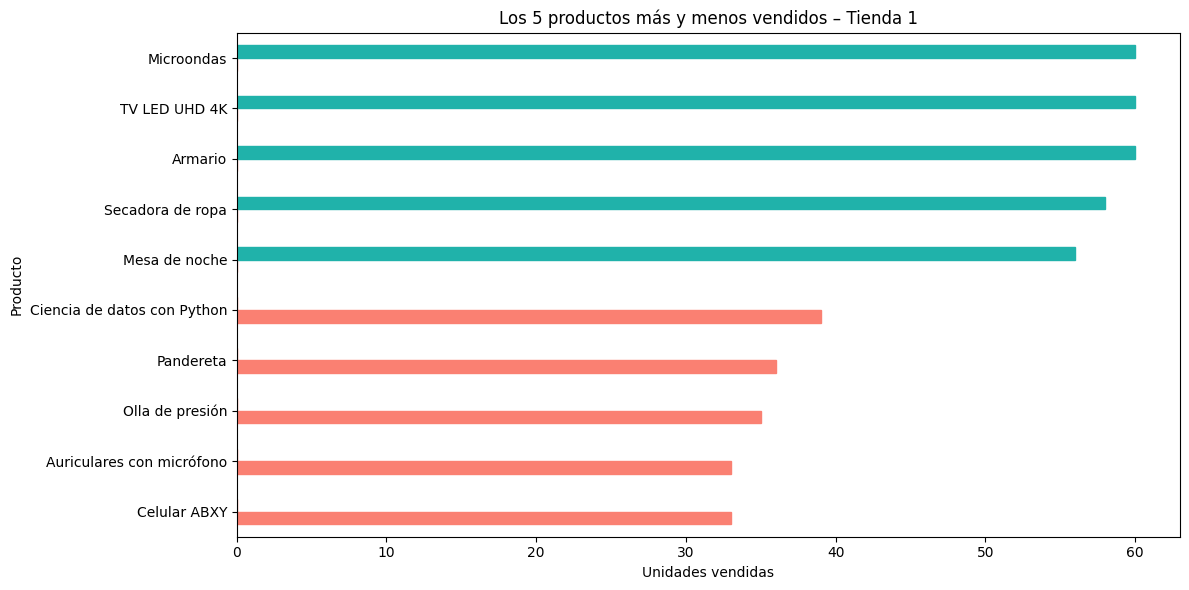

<Figure size 640x480 with 0 Axes>

In [139]:
ax = t1_top_ultimos.plot(
    kind='barh',
    figsize=(12,6),
    legend=False
)
ax.set_title('Los 5 productos más y menos vendidos – Tienda 1')
ax.set_xlabel('Unidades vendidas')
ax.invert_yaxis()

for i, barra in enumerate(ax.patches):
    if i < 5:
        barra.set_color('lightseagreen')  # top 5
    else:
        barra.set_color('salmon')            # bottom 5

plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()


### **Tienda 2: productos más y menos vendidos.**

In [ ]:
t2_venta_productos = tienda2['Producto'].value_counts()
t2_venta_productos


In [131]:
t2_top5  = t2_venta_productos.head(5)
t2_ultimos5 = t2_venta_productos.tail(5)

In [133]:
t2_top_ultimos = pd.concat([t2_top5, t2_ultimos5], axis=1)
t2_top_ultimos

,count,count
Producto,,
Iniciando en programación,65.0,NaN
Microondas,62.0,NaN
Batería,61.0,NaN
Guitarra acústica,58.0,NaN
Pandereta,58.0,NaN
Auriculares,NaN,37.0
Sillón,NaN,35.0
Mesa de comedor,NaN,34.0
Impresora,NaN,34.0


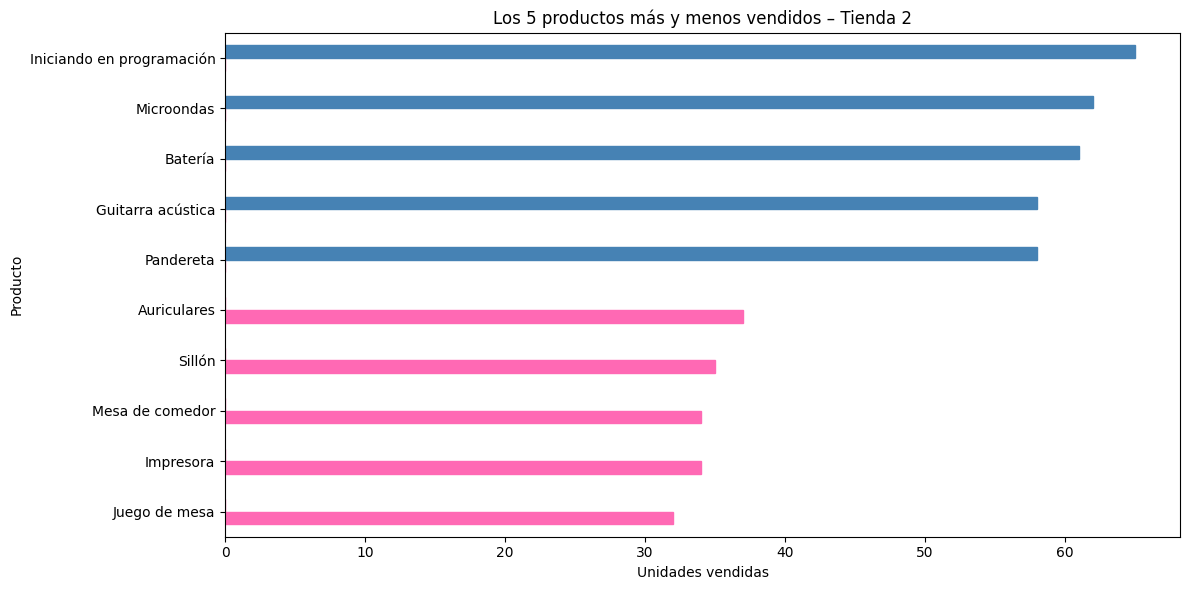

<Figure size 640x480 with 0 Axes>

In [140]:
ax = t2_top_ultimos.plot(
    kind='barh',
    figsize=(12,6),
    legend=False
)
ax.set_title('Los 5 productos más y menos vendidos – Tienda 2')
ax.set_xlabel('Unidades vendidas')
ax.invert_yaxis()

for i, barra in enumerate(ax.patches):
    if i < 5:
        barra.set_color('steelblue')  # top 5
    else:
        barra.set_color('hotpink')            # bottom 5

plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()

### **Tienda 3: productos más y menos vendidos.**

In [ ]:
t3_venta_productos = tienda3['Producto'].value_counts()
t3_venta_productos

In [141]:
t3_top5  = t3_venta_productos.head(5)
t3_ultimos5 = t3_venta_productos.tail(5)

In [142]:
t3_top_ultimos = pd.concat([t3_top5, t3_ultimos5], axis=1)
t3_top_ultimos

,count,count
Producto,,
Kit de bancas,57.0,NaN
Mesa de comedor,56.0,NaN
Cama king,56.0,NaN
Set de ollas,55.0,NaN
Mesa de noche,55.0,NaN
Guitarra eléctrica,NaN,38.0
Set de vasos,NaN,36.0
Mochila,NaN,36.0
Microondas,NaN,36.0


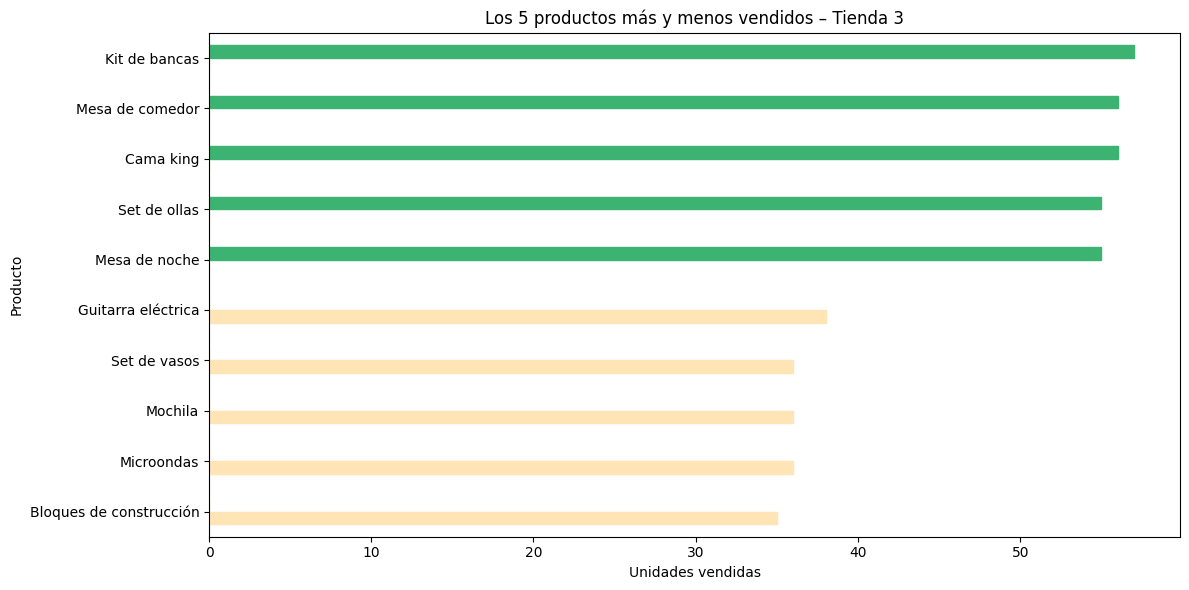

<Figure size 640x480 with 0 Axes>

In [143]:
ax = t3_top_ultimos.plot(
    kind='barh',
    figsize=(12,6),
    legend=False
)
ax.set_title('Los 5 productos más y menos vendidos – Tienda 3')
ax.set_xlabel('Unidades vendidas')
ax.invert_yaxis()

for i, barra in enumerate(ax.patches):
    if i < 5:
        barra.set_color('mediumseagreen')  # top 5
    else:
        barra.set_color('moccasin')            # bottom 5

plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()

In [ ]:
t4_venta_productos = tienda4['Producto'].value_counts()
t4_venta_productos

# 5. Envío promedio por tienda